IDENTIFYING THE PROBLEM  AND PREDICTING THE WAY TO SOLVE WHERE MATHEMATICALLY AND THEROTICALLYS COMES INTO ACTION
1.Collecting data
2.removing duplicates
3.identifying missing values and according the problem filling or removing
4.Getting insights through EDA analysis-visualization
5.converting catgorical vales to numerical either one hot encoding (dummy varables)
6.making into dependant and independent variables
7.selecting model i mean algothim based on output values
8.fitting model and predicting
9.by evaluation metrics if the accuracy is high then again we can through yperparameter tuning where we can adjust or addd the parameters that differs the accuracy 
10.selecting different algorithms and pdicting acccuracy
11.while predicting we can undergo overfitting and underfitting finding solutions to them



In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
#from imblearn.combine import SMOTEEnn


In [84]:
df=pd.read_csv(r"/Users/harshavardhan/ML PROJECTS/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [85]:
df
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [86]:
df.shape

(7043, 21)

**EXPLORATORY DATA ANALYSIS BEFORE CLEANING THE DATA AND REMOVING COLUMNS**

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [88]:
df.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
0002-ORFBO  Female  0              Yes      Yes         9       Yes           No                DSL              No                   Yes                  No                   Yes                  Yes                  No                   One year        Yes               Mailed check               65.60           593.3         No       1
6616-AALSR  Female  0              Yes      Yes         65      Yes           Yes               Fiber optic      Yes                  No                   Yes                  No                   Yes                  Yes                  Two year        Yes               Credit card (automatic)    104.30          6725.3 

In [89]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [90]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

here there is no missing values so we can skip it but if dataset contains misssing values more than 40% we can remove those column if not there are statistical process for filling missing values based on outliers if it has outliers and the column values are numerical or intehegrs we can go with mean ,median-Numerical data with outliers or skewed distribution,mode- Categorical data or discrete numerical data

if the dependant variable has more imbalanced data then we have to balance it with other features

Entire independat and dependaent varible values should be numerical or integers if not we have to transform it from categorical to numerical by 1. Label Encoding -Ordinal data (categories with natural order)xample Use Cases:
Education level: High School (0) < Bachelor (1) < Master (2) < PhD (3)
Size: Small (0) < Medium (1) < Large (2)
Rating: Poor (0) < Fair (1) < Good (2) < Excellent (3)
2. One-Hot Encoding (Dummy Variables)-Nominal data (no natural order, few categories)
ity_Chicago  city_LA  city_NYC
0            0        0         1
1            0        1         0
2            1        0         0


In [91]:
print(df['TotalCharges'].dtype) 

object


In [92]:
print(df['TotalCharges'].unique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [93]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [94]:
df["Partner"].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [95]:
df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [96]:
df["tenure"].value_counts()
#df["tenure"].describe()#

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [97]:
df["PhoneService"].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [98]:
df["MultipleLines"].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [99]:
df["OnlineSecurity"].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [100]:
df["OnlineBackup"].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [101]:
df["DeviceProtection"].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [102]:
df["TechSupport"].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [103]:
df["StreamingTV"].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [104]:
df["StreamingMovies"].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [105]:
df["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [106]:
df["PaperlessBilling"].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [107]:
df["PaymentMethod"].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [108]:
df["MonthlyCharges"].value_counts()

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

**Univariate Analysis (One Variable)**
Analyzing one variable at a time to understand its distribution and characteristics.

**For Numerical Variables:**
Mean, median, mode,Standard deviation,variance,Min,max,range,Histograms,boxplots, density plots

**For Categorical Variables:**
Frequency counts,Percentages,Bar charts, pie charts



**Bivariate Analysis (Two Variables)**
Analyzing the relationship between two variables.

**Numerical vs Numerical:**
Scatter plots,Correlation coefficient,Line plots

**Categorical vs Categorical:**
Cross-tabulation (crosstab),Stacked bar charts,Chi-square test

**Numerical vs Categorical:**
Box plots,Violin plots,Bar charts with mean/median

**Multivariate Analysis (Three or More Variables)**
Analyzing the relationship among multiple variables simultaneously.
**Techniques:**
Correlation matrix & heatmap,Pair plots3D scatter plotsMultiple regression,Principal Component Analysis (PCA),Feature importance in ML models

In [109]:
df[["gender","Churn"]].value_counts()

gender  Churn
Male    No       2625
Female  No       2549
        Yes       939
Male    Yes       930
Name: count, dtype: int64

In [110]:
df[["SeniorCitizen","Churn","gender"]].value_counts()

SeniorCitizen  Churn  gender
0              No     Male      2287
                      Female    2221
               Yes    Female     699
                      Male       694
1              No     Male       338
                      Female     328
               Yes    Female     240
                      Male       236
Name: count, dtype: int64

In [111]:
df[["Partner","gender","Churn"]].value_counts()

Partner  gender  Churn
Yes      Female  No       1369
         Male    No       1364
No       Male    No       1261
         Female  No       1180
                 Yes       620
         Male    Yes       580
Yes      Male    Yes       350
         Female  Yes       319
Name: count, dtype: int64

In [112]:
df[["Dependents","gender","Churn"]].value_counts()

Dependents  gender  Churn
No          Male    No       1704
            Female  No       1686
Yes         Male    No        921
            Female  No        863
No          Female  Yes       774
            Male    Yes       769
Yes         Female  Yes       165
            Male    Yes       161
Name: count, dtype: int64

In [113]:
df[["Churn","tenure","gender"]].value_counts()

Churn  tenure  gender
Yes    1       Male      194
               Female    186
No     72      Male      182
               Female    174
       1       Male      135
                        ... 
Yes    64      Male        1
       69      Female      1
       51      Female      1
       63      Male        1
       59      Female      1
Name: count, Length: 290, dtype: int64

In [114]:
df[["PhoneService","gender","Churn"]].value_counts()

PhoneService  gender  Churn
Yes           Male    No       2364
              Female  No       2298
                      Yes       859
              Male    Yes       840
No            Male    No        261
              Female  No        251
              Male    Yes        90
              Female  Yes        80
Name: count, dtype: int64

In [115]:
df[["Churn","gender","MultipleLines"]].value_counts()

Churn  gender  MultipleLines   
No     Male    No                  1313
       Female  No                  1228
               Yes                 1070
       Male    Yes                 1051
Yes    Female  No                   443
       Male    Yes                  434
       Female  Yes                  416
       Male    No                   406
No     Male    No phone service     261
       Female  No phone service     251
Yes    Male    No phone service      90
       Female  No phone service      80
Name: count, dtype: int64

In [116]:
df[["Churn","gender","InternetService"]].value_counts()

Churn  gender  InternetService
No     Male    DSL                993
       Female  DSL                969
       Male    Fiber optic        910
       Female  Fiber optic        889
       Male    No                 722
       Female  No                 691
Yes    Female  Fiber optic        664
       Male    Fiber optic        633
               DSL                240
       Female  DSL                219
       Male    No                  57
       Female  No                  56
Name: count, dtype: int64

In [117]:
df[["Churn","gender","OnlineSecurity"]].value_counts()

Churn  gender  OnlineSecurity     
No     Male    No                     1044
       Female  No                      993
               Yes                     865
       Male    Yes                     859
Yes    Male    No                      740
No     Male    No internet service     722
Yes    Female  No                      721
No     Female  No internet service     691
Yes    Female  Yes                     162
       Male    Yes                     133
               No internet service      57
       Female  No internet service      56
Name: count, dtype: int64

In [118]:
df[["Churn","gender","OnlineBackup"]].value_counts()

Churn  gender  OnlineBackup       
No     Female  Yes                    961
       Male    No                     958
               Yes                    945
       Female  No                     897
       Male    No internet service    722
       Female  No internet service    691
Yes    Female  No                     618
       Male    No                     615
       Female  Yes                    265
       Male    Yes                    258
               No internet service     57
       Female  No internet service     56
Name: count, dtype: int64

In [119]:
df[["Churn","gender","DeviceProtection"]].value_counts()

Churn  gender  DeviceProtection   
No     Male    No                     962
               Yes                    941
       Female  Yes                    936
               No                     922
       Male    No internet service    722
       Female  No internet service    691
Yes    Female  No                     616
       Male    No                     595
               Yes                    278
       Female  Yes                    267
       Male    No internet service     57
       Female  No internet service     56
Name: count, dtype: int64

In [120]:
df[["Churn","gender","TechSupport"]].value_counts()

Churn  gender  TechSupport        
No     Male    No                     1031
       Female  No                      996
       Male    Yes                     872
       Female  Yes                     862
Yes    Male    No                      728
No     Male    No internet service     722
Yes    Female  No                      718
No     Female  No internet service     691
Yes    Female  Yes                     165
       Male    Yes                     145
               No internet service      57
       Female  No internet service      56
Name: count, dtype: int64

In [121]:
df[["Churn","gender","StreamingTV"]].value_counts()

Churn  gender  StreamingTV        
No     Male    No                     963
       Female  Yes                    953
       Male    Yes                    940
       Female  No                     905
       Male    No internet service    722
       Female  No internet service    691
Yes    Female  No                     481
       Male    No                     461
               Yes                    412
       Female  Yes                    402
       Male    No internet service     57
       Female  No internet service     56
Name: count, dtype: int64

In [122]:
df[["Churn","gender","StreamingMovies"]].value_counts()

Churn  gender  StreamingMovies    
No     Female  Yes                    964
       Male    No                     953
               Yes                    950
       Female  No                     894
       Male    No internet service    722
       Female  No internet service    691
Yes    Female  No                     476
       Male    No                     462
               Yes                    411
       Female  Yes                    407
       Male    No internet service     57
       Female  No internet service     56
Name: count, dtype: int64

In [123]:
df[["Churn","gender","Contract"]].value_counts()

Churn  gender  Contract      
No     Male    Month-to-month    1137
       Female  Month-to-month    1083
Yes    Female  Month-to-month     842
No     Male    Two year           824
       Female  Two year           823
Yes    Male    Month-to-month     813
No     Male    One year           664
       Female  One year           643
Yes    Male    One year            91
       Female  One year            75
       Male    Two year            26
       Female  Two year            22
Name: count, dtype: int64

In [124]:
df[["Churn","gender","PaperlessBilling"]].value_counts()

Churn  gender  PaperlessBilling
No     Female  Yes                 1387
       Male    Yes                 1384
               No                  1241
       Female  No                  1162
Yes    Male    Yes                  701
       Female  Yes                  699
               No                   240
       Male    No                   229
Name: count, dtype: int64

In [125]:
df[["Churn","gender","PaymentMethod"]].value_counts()

Churn  gender  PaymentMethod            
No     Male    Mailed check                 676
               Credit card (automatic)      669
       Female  Bank transfer (automatic)    652
               Electronic check             648
       Male    Electronic check             646
               Bank transfer (automatic)    634
       Female  Mailed check                 628
               Credit card (automatic)      621
Yes    Male    Electronic check             549
       Female  Electronic check             522
       Male    Mailed check                 158
       Female  Mailed check                 150
               Bank transfer (automatic)    136
               Credit card (automatic)      131
       Male    Bank transfer (automatic)    122
               Credit card (automatic)      101
Name: count, dtype: int64

In [126]:
df[["Churn","gender","MonthlyCharges"]].value_counts()


Churn  gender  MonthlyCharges
No     Male    20.05             31
               19.95             30
       Female  20.05             27
       Male    19.65             23
       Female  20.10             23
                                 ..
       Male    67.85              1
               67.80              1
               67.60              1
               67.20              1
Yes    Male    118.35             1
Name: count, Length: 3482, dtype: int64

In [127]:
total_charges = df.groupby(['gender', 'Churn'])['MonthlyCharges'].sum().reset_index()

In [128]:
total_charges=df.groupby(['Churn','gender'])['MonthlyCharges'].sum().reset_index()

In [129]:
total_charges

,Churn,gender,MonthlyCharges
0,No,Female,157183.85
1,No,Male,159801.90
2,Yes,Female,70248.55
3,Yes,Male,68882.30


In [130]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')



In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [132]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [133]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [134]:
df.loc[df['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [135]:
df.dropna(inplace=True)

In [136]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

after this tenure has up to 72 months when we visulise it willlbe difficult to get 72 on sacle so let us make into groups

In [137]:
labels=["{0} -{1}".format(i,i+11)for i in range(0,72,12)]
df["tenure_group"]=pd.cut(df["tenure"],range(0,80,12),right=False,labels=labels)

In [138]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0 -11
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24 -35
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0 -11
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,36 -47
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0 -11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,24 -35
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,NaN
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0 -11
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0 -11


In [139]:
df["tenure_group"].value_counts()

tenure_group
0 -11     2058
60 -71    1121
12 -23    1047
24 -35     876
48 -59     820
36 -47     748
Name: count, dtype: int64

since w ehave different customer id according to the problrm we need to find only how many likely to churn not accoridng to the name and what will bethe reasons for churning

In [140]:
df.drop(columns=["customerID","tenure"],axis=1,inplace=True)

**EDA ANALYSIS AFTER CLEANING AND REMOVING COLUMNS**

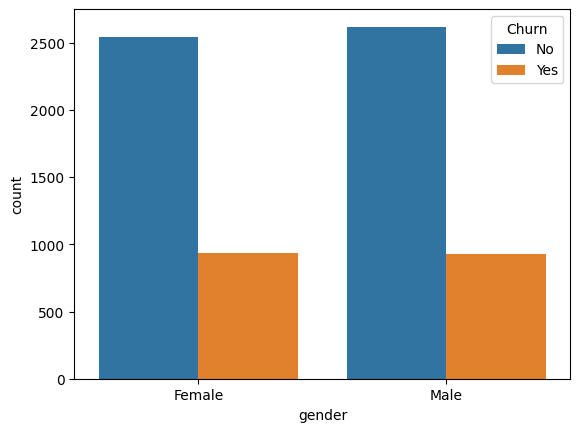

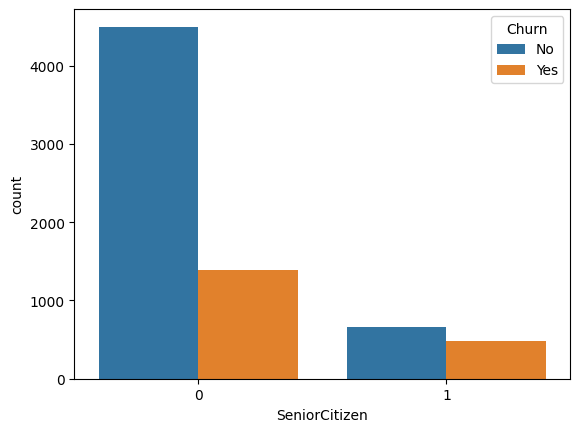

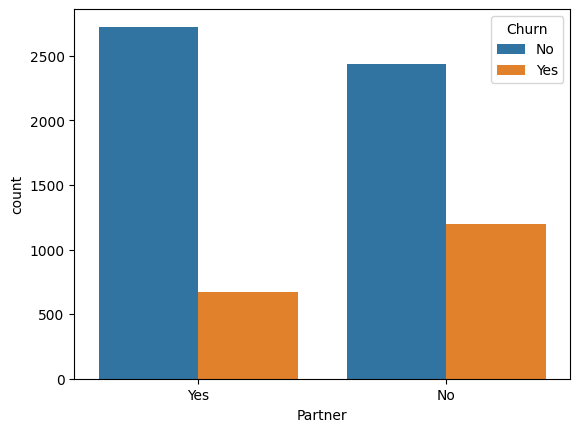

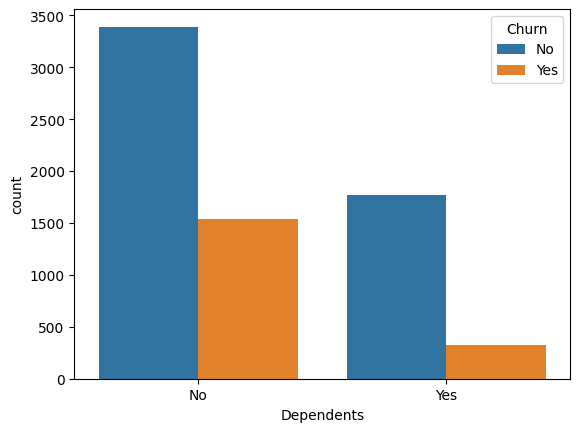

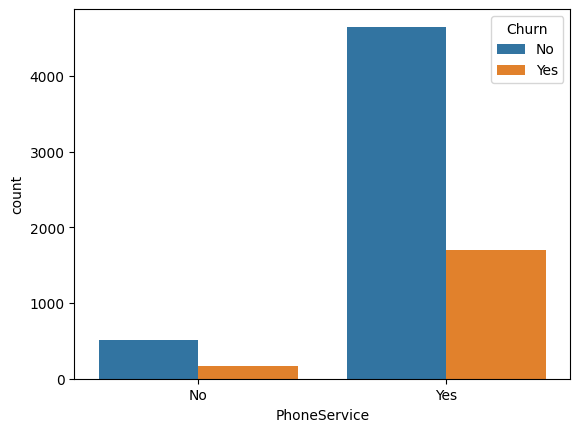

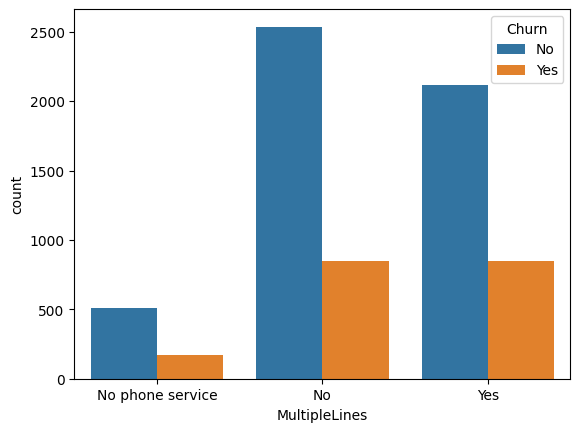

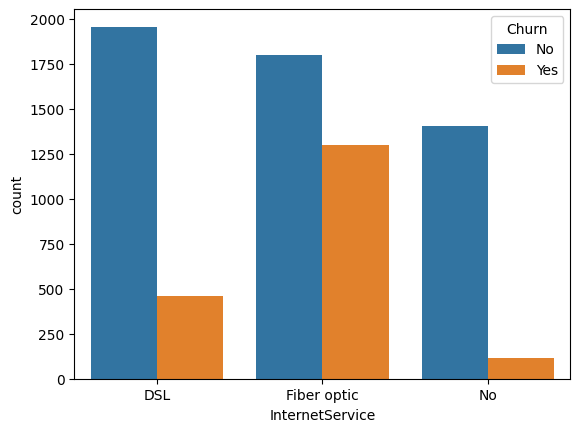

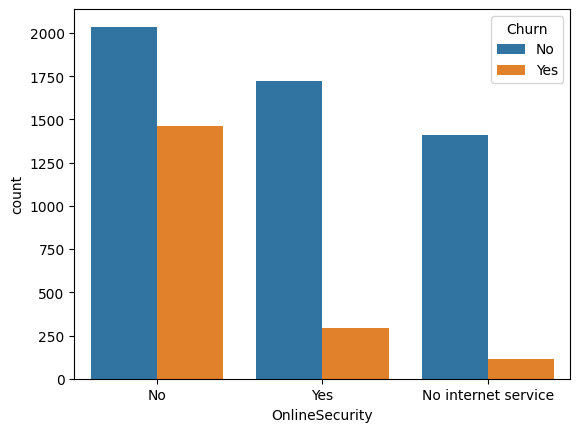

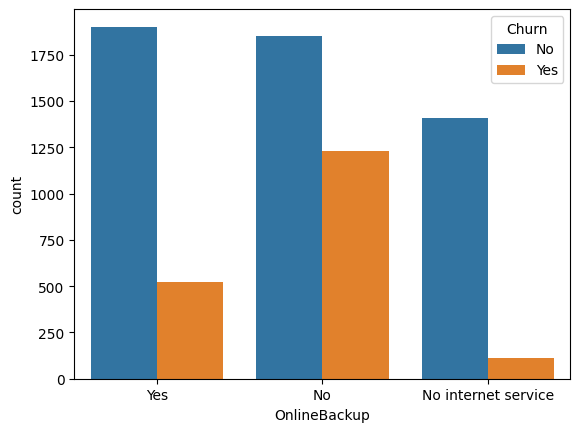

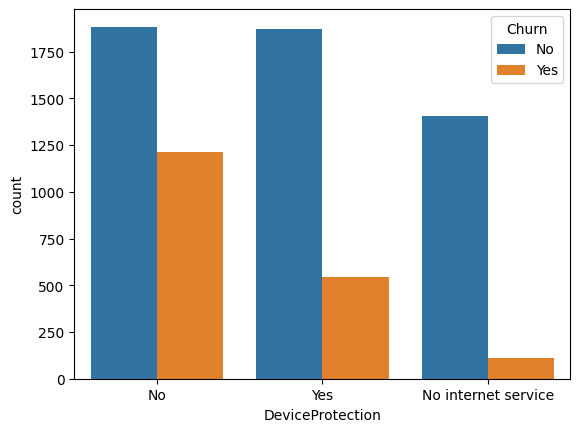

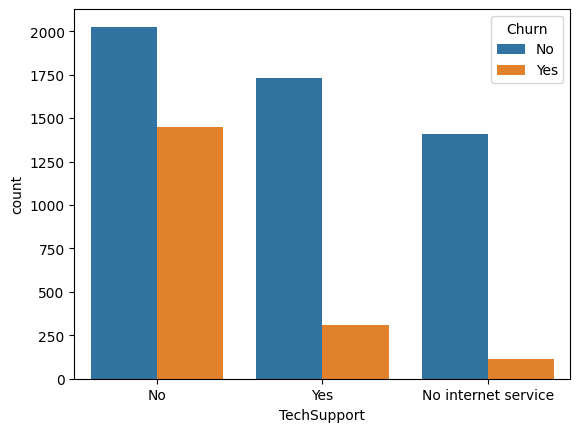

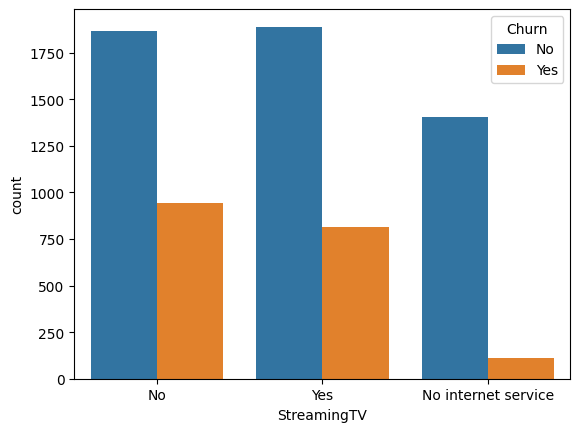

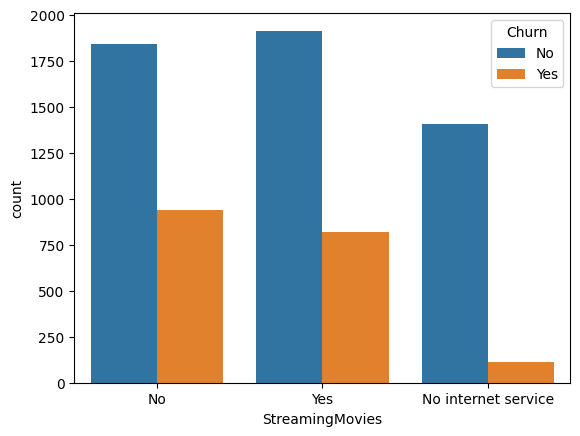

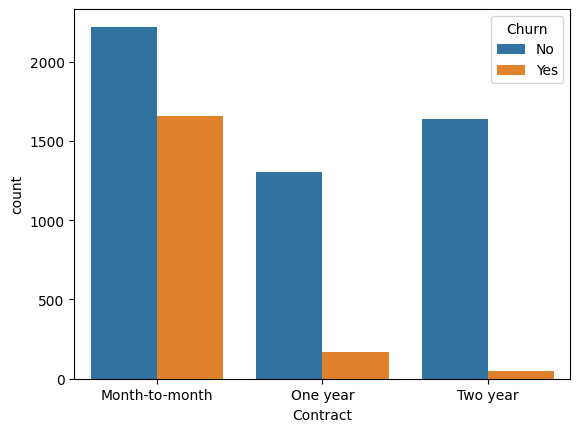

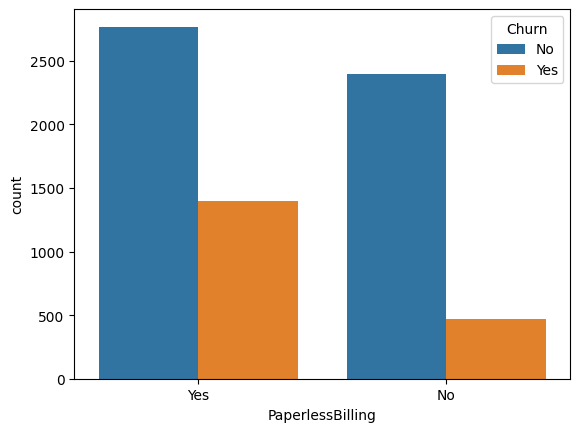

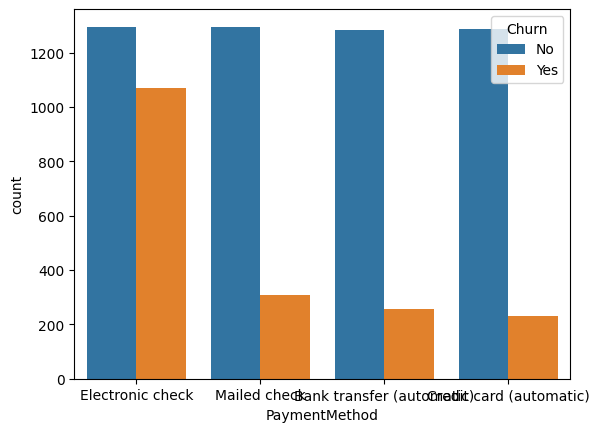

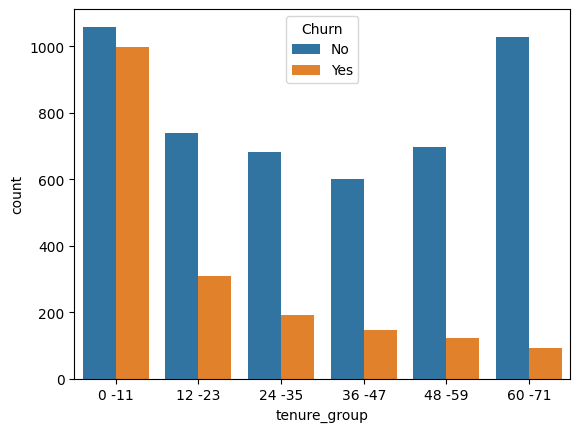

In [141]:
for i ,predictor in enumerate(df.drop(columns=["Churn","TotalCharges","MonthlyCharges"])):
    plt.figure(i)
    sns.countplot(data= df ,x=predictor,hue="Churn")

In [142]:
df["Churn"]=np.where(df["Churn"]=="Yes",1,0)

In [143]:
df["Churn"].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

Convert all the categorical values into numerical(dummies)-one hot encoding

In [144]:
df1 = pd.get_dummies(df, dtype=int)

In [145]:
df1.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_0 -11,tenure_group_12 -23,tenure_group_24 -35,tenure_group_36 -47,tenure_group_48 -59,tenure_group_60 -71
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


lmplot gives linear rleaton along with scatterplot

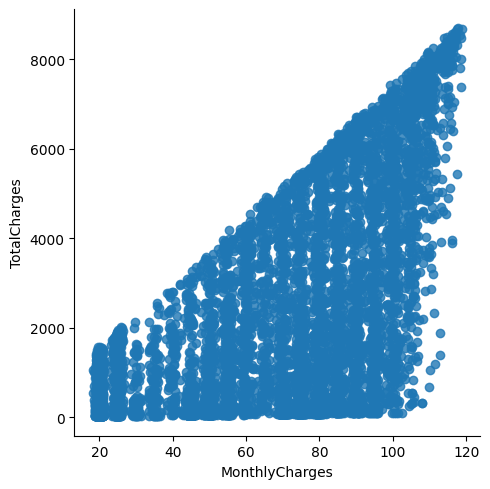

In [146]:
sns.lmplot(x="MonthlyCharges",y="TotalCharges",fit_reg=False,data=df1)

Here we can see total charges increses by monthly charges

/var/folders/ph/sz3m3_hd55j_54r8sbqy3w700000gn/T/ipykernel_14849/135977703.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 0) ],
/var/folders/ph/sz3m3_hd55j_54r8sbqy3w700000gn/T/ipykernel_14849/135977703.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

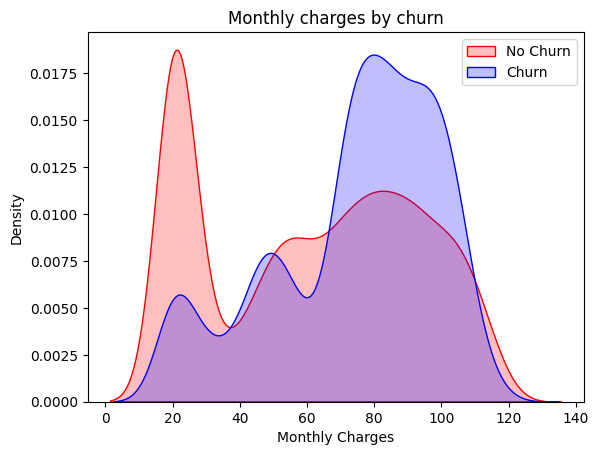

In [147]:
Mth = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df1.MonthlyCharges[(df1["Churn"] == 1) ],
    ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')


*INSIGHTS*: churn is high when monthly charges are high

In [148]:
df1.corr()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_0 -11,tenure_group_12 -23,tenure_group_24 -35,tenure_group_36 -47,tenure_group_48 -59,tenure_group_60 -71
SeniorCitizen,1.000000,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,...,-0.016235,-0.024359,0.171322,-0.152987,-0.021373,-0.007618,0.028883,0.001906,0.007006,0.003106
MonthlyCharges,0.219874,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,-0.112343,...,0.042410,0.030055,0.271117,-0.376568,-0.185248,-0.054846,0.004133,0.018721,0.059623,0.137496
TotalCharges,0.102411,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,0.064653,...,0.186119,0.182663,-0.060436,-0.294708,-0.575846,-0.228635,-0.061504,0.074729,0.232397,0.507891
Churn,0.150541,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,-0.163128,...,-0.118136,-0.134687,0.301455,-0.090773,0.319816,0.027783,-0.038825,-0.055138,-0.095228,-0.180230
gender_Female,0.001819,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,...,0.015973,-0.001632,-0.000844,-0.013199,-0.002089,0.011516,-0.015408,0.012464,0.014044,-0.015726
gender_Male,-0.001819,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,...,-0.015973,0.001632,0.000844,0.013199,0.002089,-0.011516,0.015408,-0.012464,-0.014044,0.015726
Partner_No,-0.016957,-0.097825,-0.319072,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,...,-0.111406,-0.082327,0.083207,0.096948,0.298986,0.064105,-0.004587,-0.030538,-0.098727,-0.211546
Partner_Yes,0.016957,0.097825,0.319072,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,...,0.111406,0.082327,-0.083207,-0.096948,-0.298986,-0.064105,0.004587,0.030538,0.098727,0.211546
Dependents_No,0.210550,0.112343,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,...,-0.052369,-0.061134,0.149274,-0.056448,0.146372,0.002201,-0.009900,-0.015853,-0.036054,-0.084377
Dependents_Yes,-0.210550,-0.112343,0.064653,-0.163128,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,...,0.052369,0.061134,-0.149274,0.056448,-0.146372,-0.002201,0.009900,0.015853,0.036054,0.084377


<Axes: >

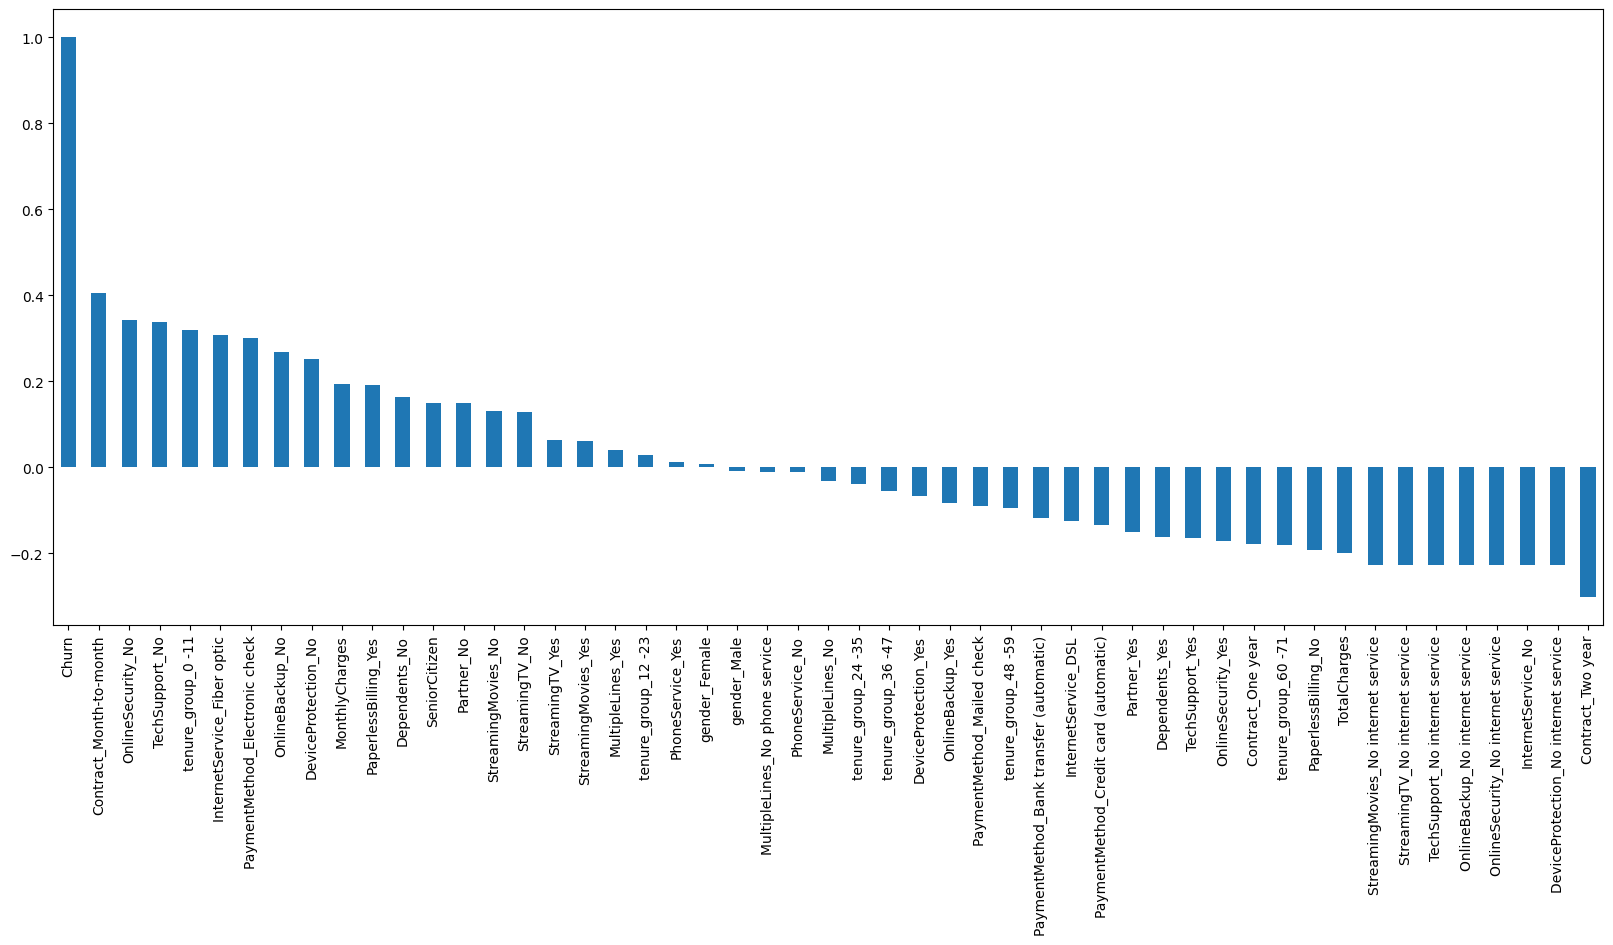

In [149]:
plt.figure(figsize=(20,8))
df1.corr()['Churn']. sort_values(ascending=False).plot(kind="bar")

*INSIGHTS*- high correlation can be seen in contract_month to month,onlinesecurity_no,techsupport_no,tenure _group,internet service,payment method,online backup device protection monthly charges

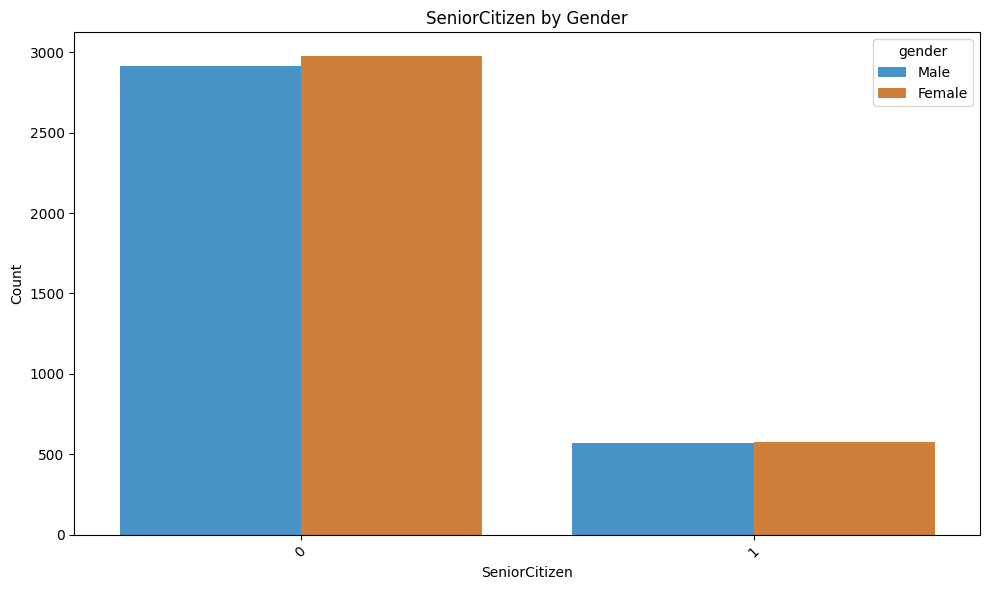

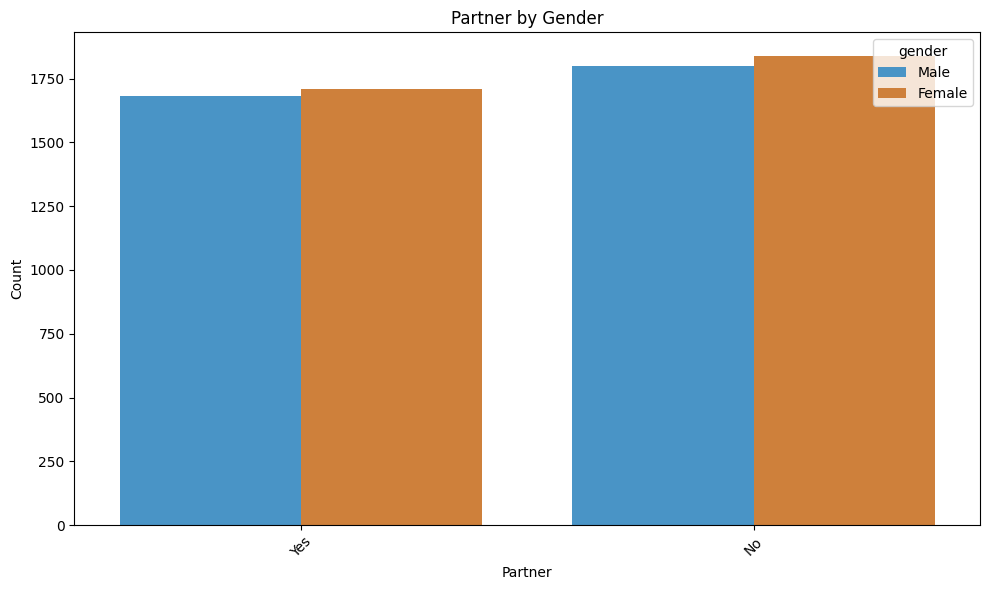

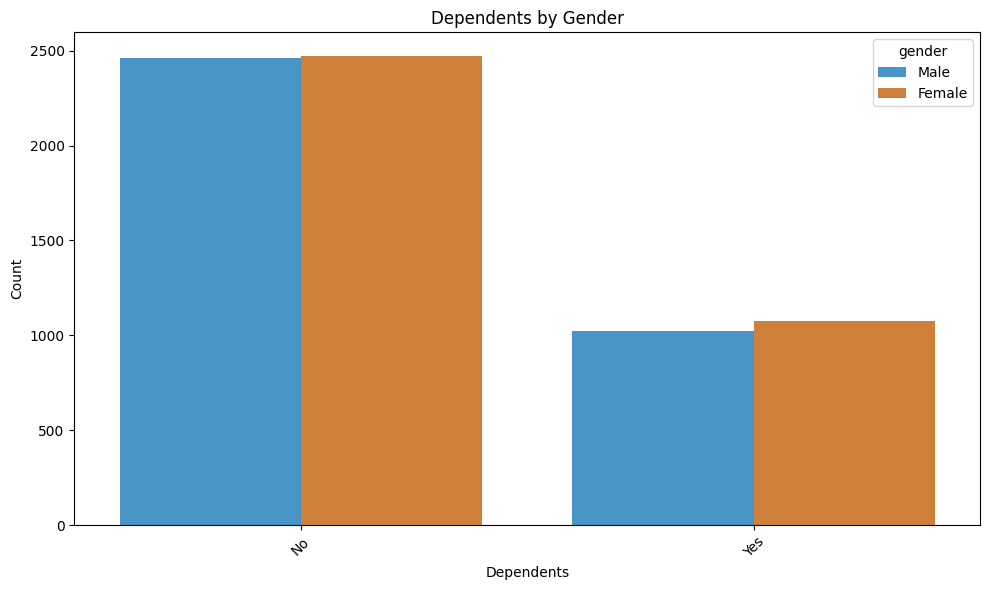

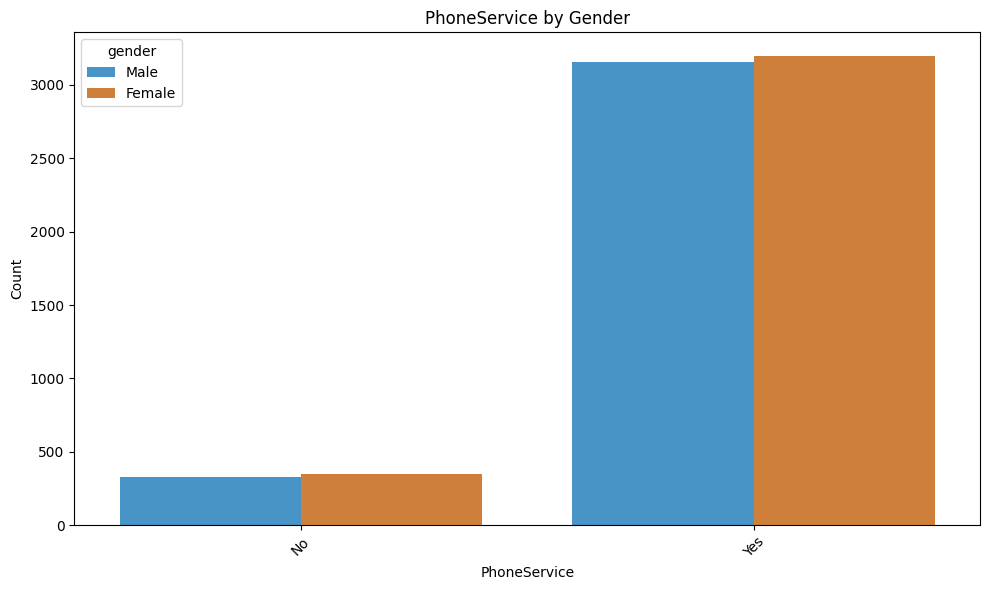

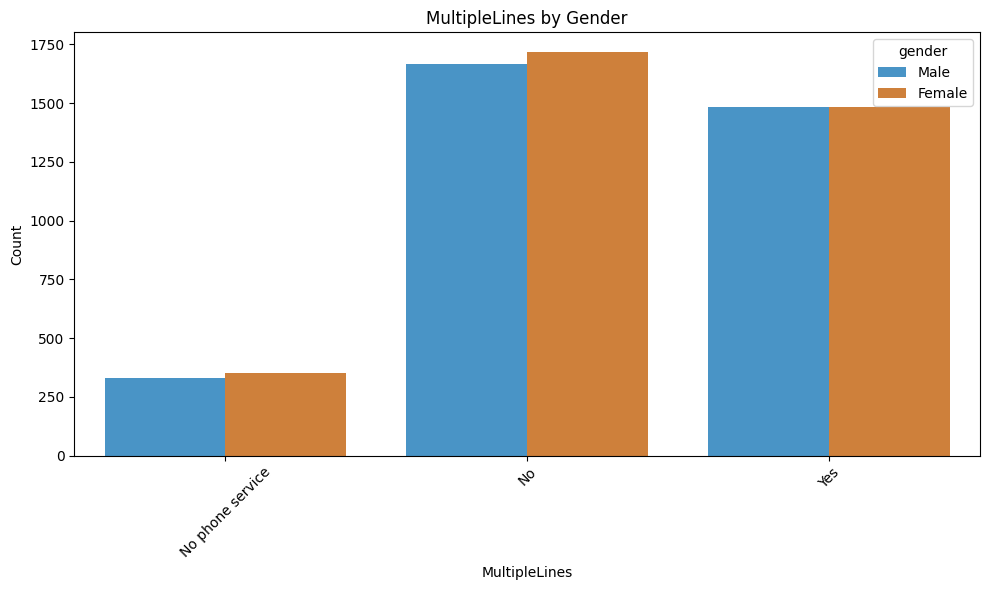

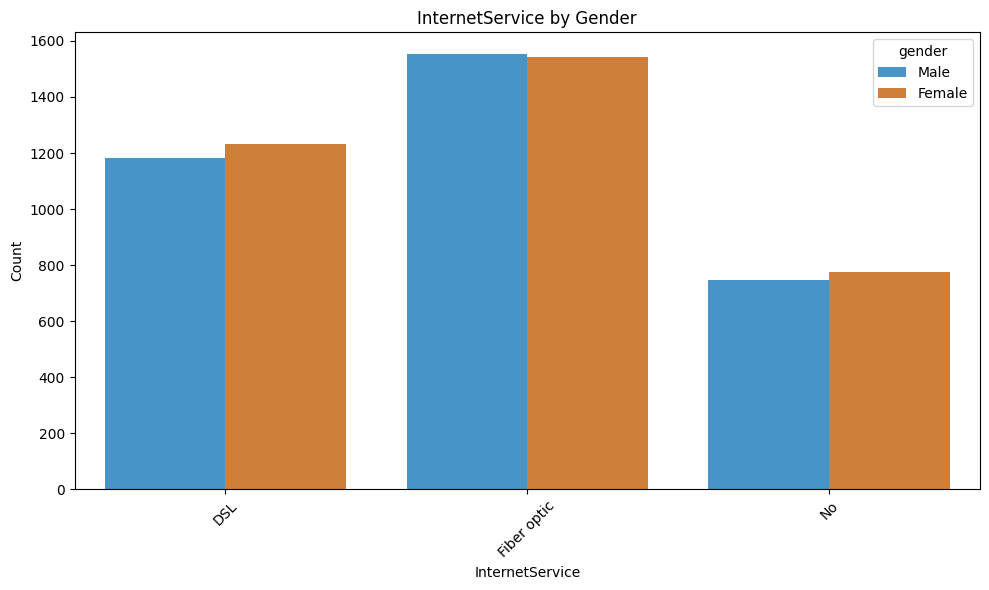

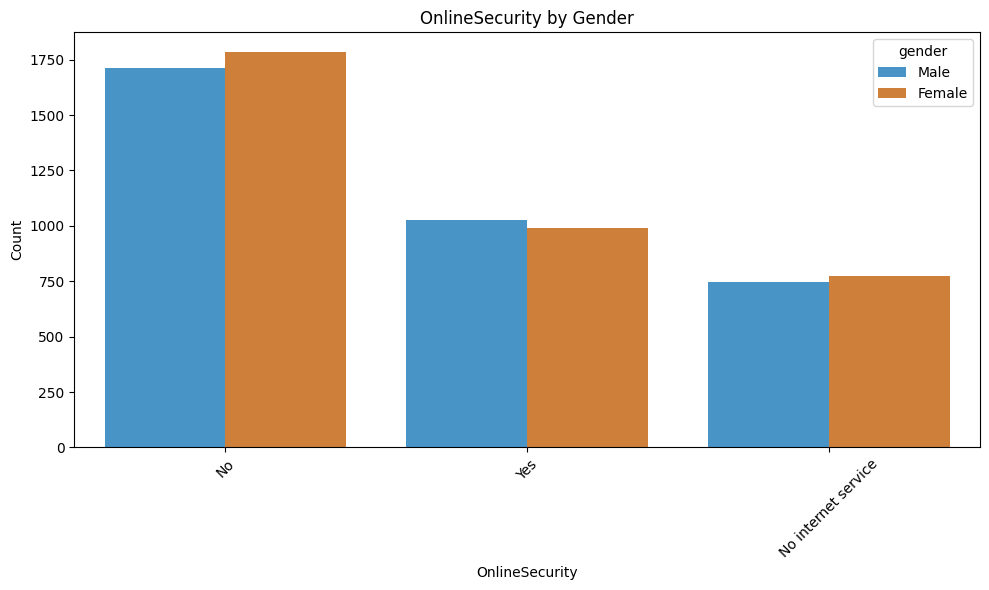

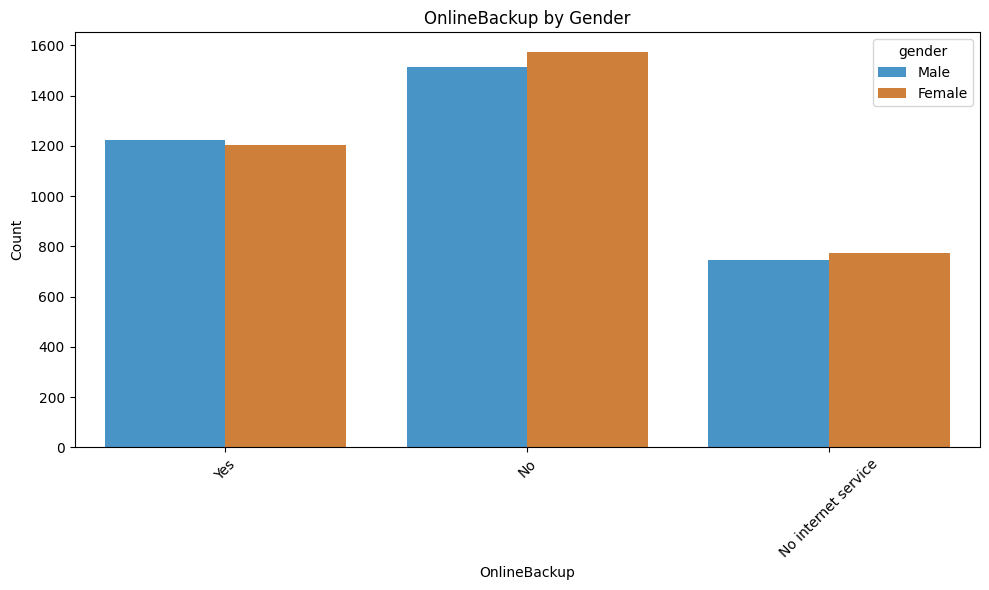

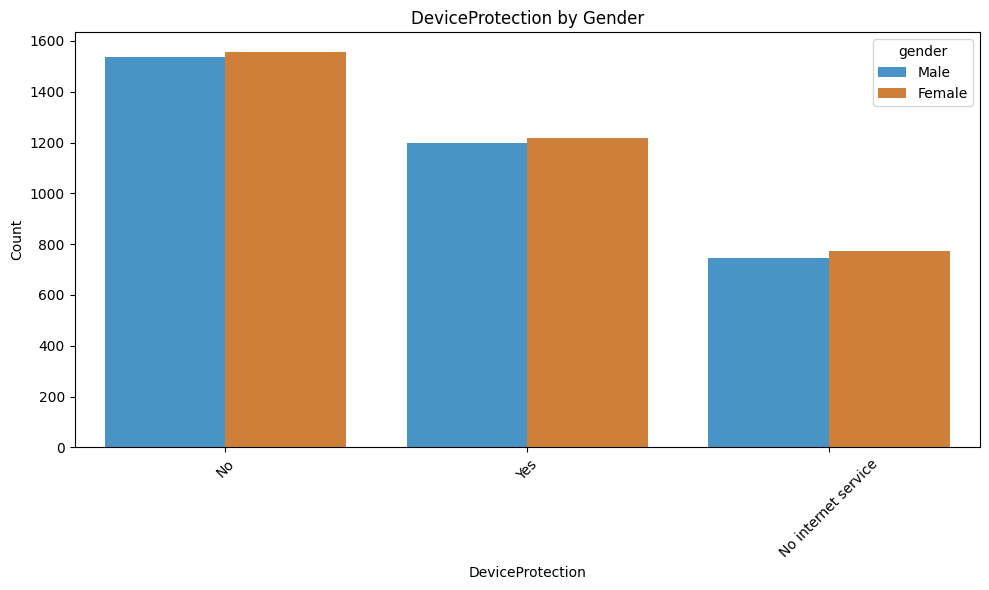

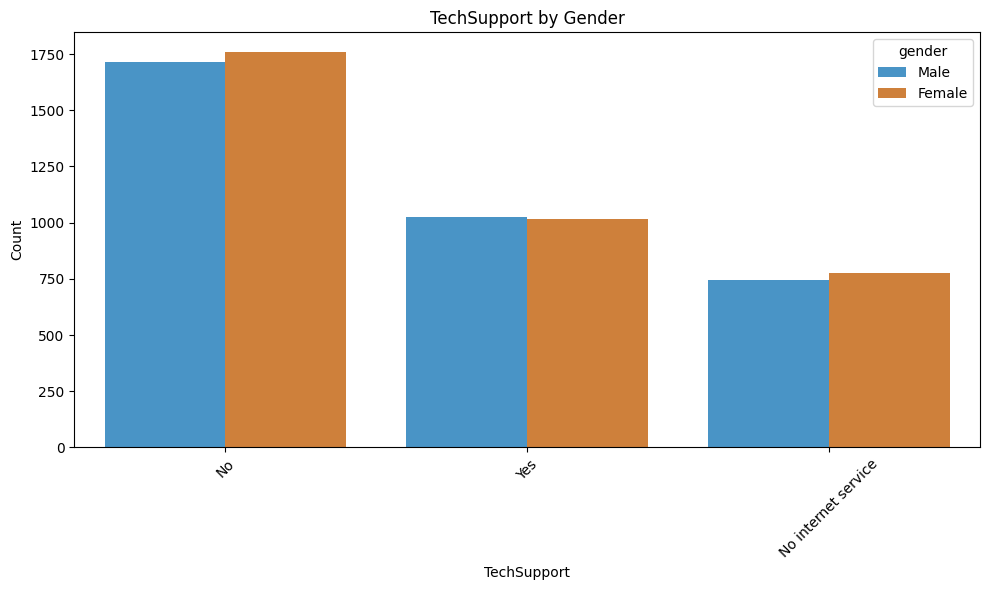

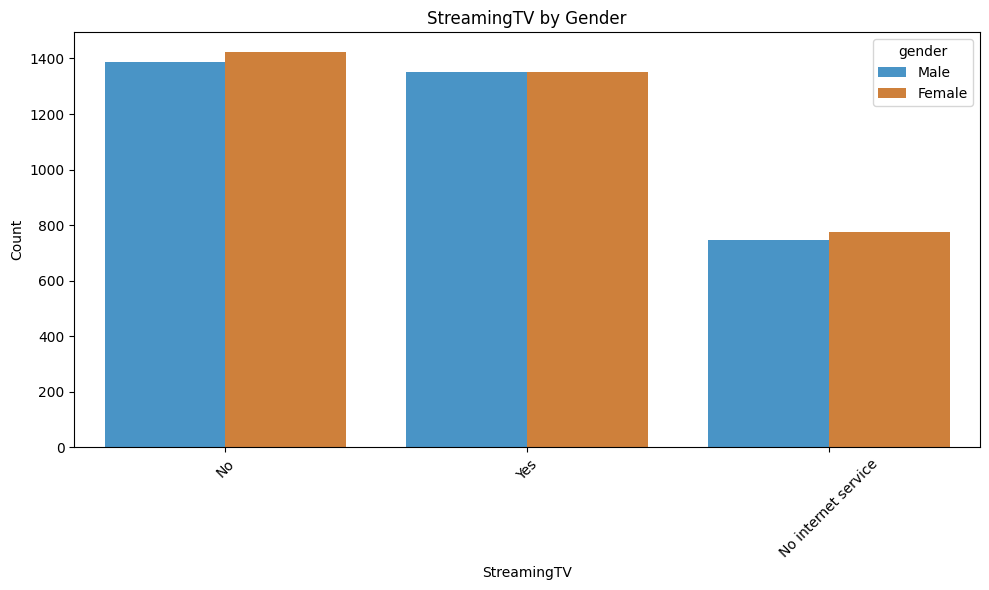

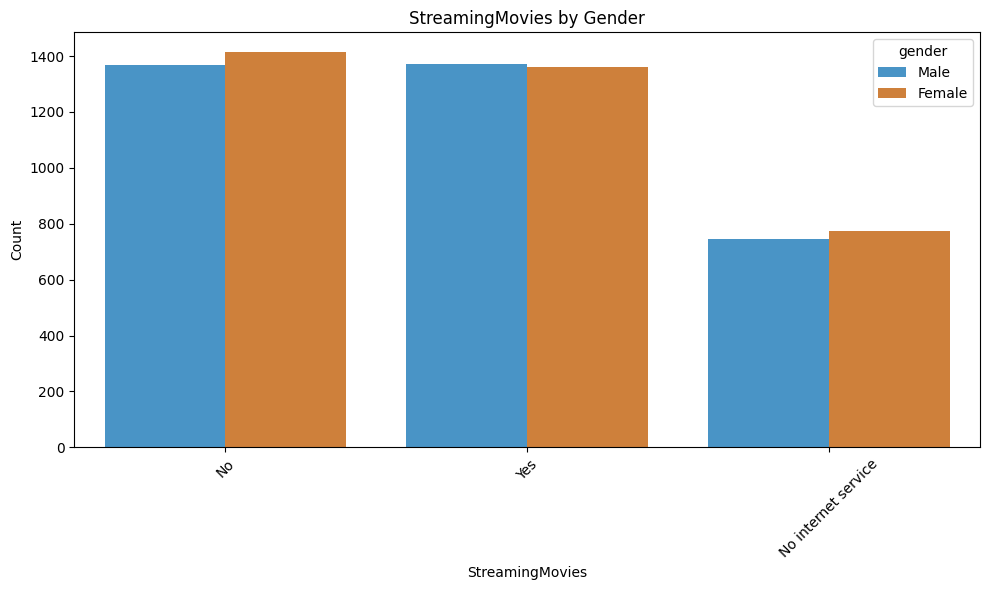

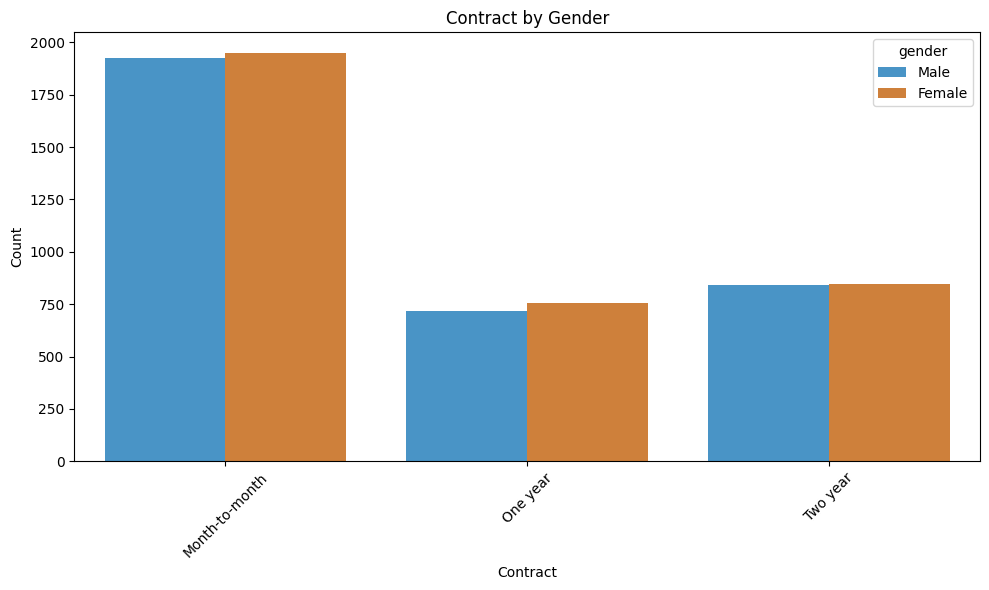

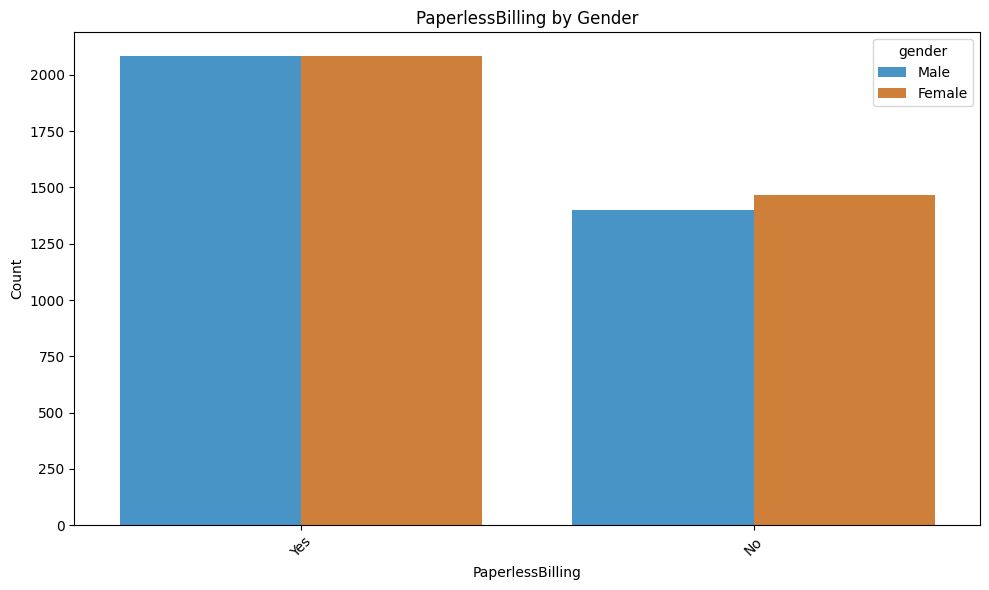

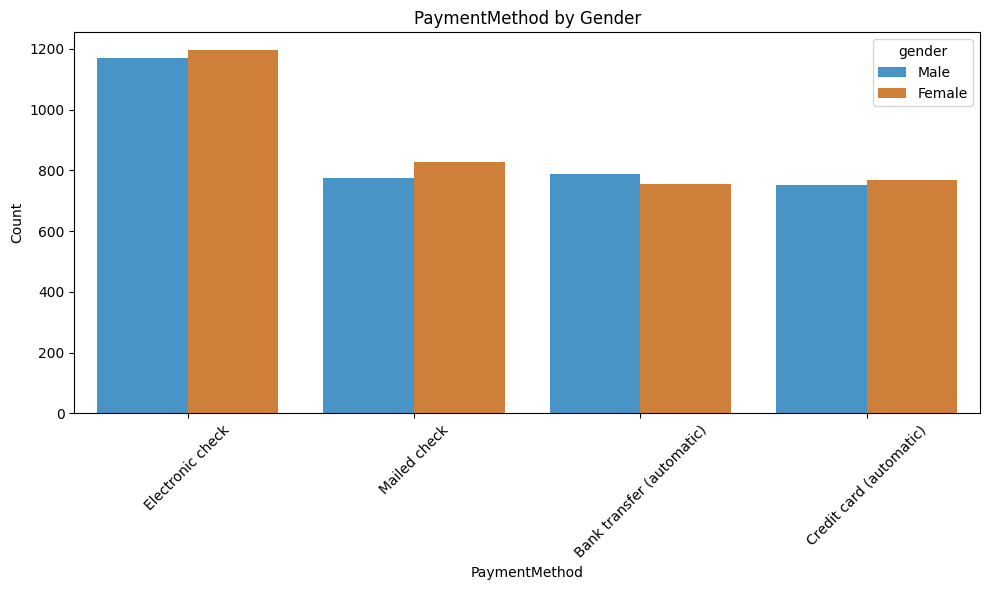

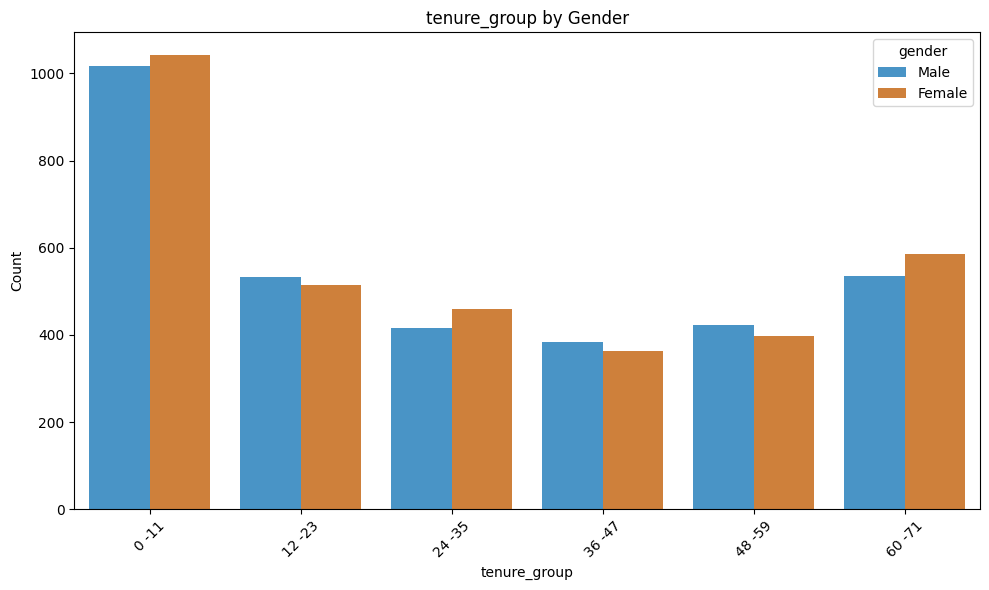

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

for i, predictor in enumerate(df.drop(columns=["Churn", "TotalCharges", "MonthlyCharges"])):
    if predictor == "gender":
        continue
    
    plt.figure(i, figsize=(10, 6))
    sns.countplot(data=df, x=predictor, hue="gender", palette=["#3498db", "#e67e22"])
    plt.title(f'{predictor} by Gender')
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.legend(title='gender', labels=['Male', 'Female'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

electronic check medium are highest churners
non citizens are more likely to churn 
tenire group in 0-11 are likely to churn more
no online security no tech support are highly churn 
contract type -monthly customers are mor elikely to churn becsuae they doenst ahjve subscription and ther are free to go

**MODEL**
since it is calssifaiction problem we will go with decision tree and as well as we will cehck with random forest algorthim as well

In [151]:
x=df1.drop(columns=["Churn"],axis=1)
y=df1["Churn"]

In [152]:
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_0 -11,tenure_group_12 -23,tenure_group_24 -35,tenure_group_36 -47,tenure_group_48 -59,tenure_group_60 -71
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
7039,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
7040,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [153]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=40)

In [155]:
x_train

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_0 -11,tenure_group_12 -23,tenure_group_24 -35,tenure_group_36 -47,tenure_group_48 -59,tenure_group_60 -71
1777,0,54.90,1505.15,1,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3610,0,100.15,1164.30,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
6600,0,29.70,91.70,1,0,0,1,0,1,1,...,0,1,0,0,1,0,0,0,0,0
5839,1,75.40,533.05,0,1,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,0
4048,0,59.75,3624.35,1,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,0,20.55,187.35,1,0,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
6318,0,21.05,235.80,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
6160,0,89.65,3348.10,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
6372,0,19.50,96.85,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0


DECISION TREE CALSSIFIER

In [156]:
model_dt=DecisionTreeClassifier(criterion="gini",max_depth=7,random_state=50,min_samples_leaf=5)

In [157]:
model_dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,50
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [158]:
y_pred=model_dt.predict(x_test)

In [159]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], shape=(2813,))

Comparing the actual values and predicted values

In [160]:
print(classification_report(y_test,y_pred,labels=[0,1],target_names=["no churn","churn"]))

              precision    recall  f1-score   support

    no churn       0.84      0.86      0.85      2069
       churn       0.58      0.53      0.56       744

    accuracy                           0.78      2813
   macro avg       0.71      0.70      0.70      2813
weighted avg       0.77      0.78      0.77      2813



In [161]:
print(confusion_matrix(y_test,y_pred))

[[1786  283]
 [ 347  397]]


Quick Selection Guide

Balanced dataset: Accuracy, F1-Score

Imbalanced dataset: Precision-Recall AUC, MCC, Balanced Accuracy

False positives costly: Precision, Specificity

False negatives costly: Recall, Sensitivity

Need probability quality: Log Loss, Brier Score

Compare across thresholds: ROC-AUC, PR-AUC

Overall balance: F1-Score, MCC

1. Accuracy

Formula: (TP + TN) / (TP + TN + FP + FN)
Meaning: Overall correctness of the model
Range: 0 to 1 (higher is better)
Problem: Misleading with imbalanced datasets

2. Precision (Positive Predictive Value)

Formula: TP / (TP + FP)
Meaning: Of predicted positives, how many are correct?
Use case: When false positives are costly (spam detection, medical screening)

3. Recall (Sensitivity, True Positive Rate)

Formula: TP / (TP + FN)
Meaning: Of actual positives, how many did we catch?
Use case: When false negatives are costly (disease detection, fraud detection)

4. Specificity (True Negative Rate)

Formula: TN / (TN + FP)
Meaning: Of actual negatives, how many did we correctly identify?
Use case: Important when identifying true negatives matters

5. F1-Score

Formula: 2 × (Precision × Recall) / (Precision + Recall)
Meaning: Harmonic mean of precision and recall
Use case: When you need balance between precision and recall

6. F-Beta Score

Formula: (1 + β²) × (Precision × Recall) / (β² × Precision + Recall)
Meaning: Weighted harmonic mean
β < 1: Favors precision
β > 1: Favors recall
β = 1: Equal to F1-score

Error Rates
7. False Positive Rate (FPR, Type I Error)

Formula: FP / (FP + TN) = 1 - Specificity
Meaning: Proportion of negatives incorrectly classified as positive

8. False Negative Rate (FNR, Type II Error)

Formula: FN / (FN + TP) = 1 - Recall
Meaning: Proportion of positives incorrectly classified as negative

9. False Discovery Rate (FDR)

Formula: FP / (FP + TP) = 1 - Precision
Meaning: Proportion of positive predictions that are wrong

Advanced Metrics
10. Matthews Correlation Coefficient (MCC)

Formula: (TP×TN - FP×FN) / √[(TP+FP)(TP+FN)(TN+FP)(TN+FN)]
Range: -1 to +1 (1 = perfect, 0 = random, -1 = total disagreement)
Advantage: Works well with imbalanced datasets

11. Cohen's Kappa

Formula: (Observed Accuracy - Expected Accuracy) / (1 - Expected Accuracy)
Range: -1 to +1
Meaning: Agreement between predictions and actual, accounting for chance

12. ROC-AUC (Receiver Operating Characteristic - Area Under Curve)

Plots: True Positive Rate vs False Positive Rate at various thresholds
Range: 0.5 (random) to 1.0 (perfect)
Use case: Evaluating model performance across all classification thresholds

13. Precision-Recall AUC

Plots: Precision vs Recall at various thresholds
Advantage: Better than ROC-AUC for imbalanced datasets

14. Log Loss (Cross-Entropy Loss)

Formula: -1/N × Σ[y×log(p) + (1-y)×log(1-p)]
Meaning: Measures probability estimate quality
Range: 0 to ∞ (lower is better)

15. Brier Score

Formula: 1/N × Σ(predicted_probability - actual_outcome)²
Range: 0 to 1 (lower is better)
Meaning: Mean squared error of probability predictions

Multi-Class Metrics
16. Macro Average

Calculate metric for each class, then take unweighted mean
Treats all classes equally

17. Micro Average

Aggregate TP, FP, FN across all classes, then calculate metric
Favors larger classes

18. Weighted Average

Calculate metric for each class, then take weighted mean by support
Accounts for class imbalance

Business-Oriented Metrics
19. Balanced Accuracy

Formula: (Recall + Specificity) / 2
Use case: Better than accuracy for imbalanced datasets

20. Positive/Negative Likelihood Ratio

PLR: Sensitivity / (1 - Specificity)
NLR: (1 - Sensitivity) / Specificity
Use case: Medical diagnostics